In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('df.csv')

In [2]:
df.總確診.fillna(0, inplace=True)
df.每日確診.fillna(0, inplace=True)
df['cov期間'] = (df.總確診 / df.總確診) -1
df.cov期間.fillna(1, inplace=True)
df.日經.fillna(method='bfill', inplace=True)
df

,Unnamed: 0,FB_VIX,S&P 500,原油,美元,道瓊,那斯達克,恒生,上證,日經,總確診,每日確診,cov期間
0,2017-01-03,20.04,2257.83,52.33,32.264,19881.76,5429.08,22150.40,3135.92,19594.16,0.0,0.0,1.0
1,2017-01-04,18.92,2270.75,53.26,32.227,19942.16,5477.00,22134.47,3158.79,19594.16,0.0,0.0,1.0
2,2017-01-05,18.07,2269.00,53.76,32.229,19899.29,5487.94,22456.69,3165.41,19520.69,0.0,0.0,1.0
3,2017-01-06,17.84,2276.98,53.99,31.943,19963.80,5521.06,22503.01,3154.32,19454.33,0.0,0.0,1.0
4,2017-01-09,17.69,2268.90,51.96,32.041,19887.38,5531.82,22558.69,3171.24,19454.33,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2020-05-13,6.53,2820.00,25.57,29.788,23247.97,8863.17,24180.30,2898.05,20267.05,4223701.0,85786.0,0.0
965,2020-05-14,7.17,2852.50,27.73,29.892,23625.34,8943.72,23829.74,2870.34,19914.78,4309652.0,85951.0,0.0
966,2020-05-15,6.83,2863.70,29.65,29.876,23685.42,9014.56,23797.47,2868.46,20037.47,4406317.0,96665.0,0.0
967,2020-05-18,6.52,2953.91,33.23,29.954,24597.37,9234.83,23934.77,2875.42,20133.73,4679764.0,81218.0,0.0


In [3]:
temp = df[:]
temp.index = range(1,len(temp)+1)
temp_map = []
for i in temp.columns:
    temp_map.append(i + '_2')
temp.columns = temp_map
df = df.join(temp)
df.dropna(inplace=True)
# df = df[150:]
df

,Unnamed: 0,FB_VIX,S&P 500,原油,美元,道瓊,那斯達克,恒生,上證,日經,...,原油_2,美元_2,道瓊_2,那斯達克_2,恒生_2,上證_2,日經_2,總確診_2,每日確診_2,cov期間_2
1,2017-01-04,18.92,2270.75,53.26,32.227,19942.16,5477.00,22134.47,3158.79,19594.16,...,52.33,32.264,19881.76,5429.08,22150.40,3135.92,19594.16,0.0,0.0,1.0
2,2017-01-05,18.07,2269.00,53.76,32.229,19899.29,5487.94,22456.69,3165.41,19520.69,...,53.26,32.227,19942.16,5477.00,22134.47,3158.79,19594.16,0.0,0.0,1.0
3,2017-01-06,17.84,2276.98,53.99,31.943,19963.80,5521.06,22503.01,3154.32,19454.33,...,53.76,32.229,19899.29,5487.94,22456.69,3165.41,19520.69,0.0,0.0,1.0
4,2017-01-09,17.69,2268.90,51.96,32.041,19887.38,5531.82,22558.69,3171.24,19454.33,...,53.99,31.943,19963.80,5521.06,22503.01,3154.32,19454.33,0.0,0.0,1.0
5,2017-01-10,17.67,2268.90,50.82,32.003,19855.53,5551.82,22744.85,3161.67,19301.44,...,51.96,32.041,19887.38,5531.82,22558.69,3171.24,19454.33,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2020-05-13,6.53,2820.00,25.57,29.788,23247.97,8863.17,24180.30,2898.05,20267.05,...,25.16,29.892,23764.78,9002.55,24245.68,2891.56,20366.48,4137915.0,71032.0,0.0
965,2020-05-14,7.17,2852.50,27.73,29.892,23625.34,8943.72,23829.74,2870.34,19914.78,...,25.57,29.788,23247.97,8863.17,24180.30,2898.05,20267.05,4223701.0,85786.0,0.0
966,2020-05-15,6.83,2863.70,29.65,29.876,23685.42,9014.56,23797.47,2868.46,20037.47,...,27.73,29.892,23625.34,8943.72,23829.74,2870.34,19914.78,4309652.0,85951.0,0.0
967,2020-05-18,6.52,2953.91,33.23,29.954,24597.37,9234.83,23934.77,2875.42,20133.73,...,29.65,29.876,23685.42,9014.56,23797.47,2868.46,20037.47,4406317.0,96665.0,0.0


In [4]:
# df = df[100:]

In [5]:
X = df[['S&P 500', '原油','美元','道瓊','那斯達克', '恒生', '上證', '日經', '每日確診','cov期間']][:len(df)-30]
# X = df[['S&P 500', '原油','美元','道瓊']][:len(df)-30]
y = df['FB_VIX'][:len(df)-30]
valid_X = df[['S&P 500', '原油','美元','道瓊','那斯達克', '恒生', '上證', '日經', '每日確診','cov期間']][len(df)-30:]
# valid_X = df[['S&P 500', '原油','美元','道瓊']][len(df)-30:]
valid_y = df['FB_VIX'][len(df)-30:]

# X['S&P 500_變動率'] = (df['S&P 500'] - df['S&P 500_2']) / df['S&P 500_2']
# X['原油_變動率'] = (df.原油 - df.原油_2) / df.原油_2
# X['美元_變動率'] = (df.美元 - df.美元_2) / df.美元_2
# X['道瓊_變動率'] = (df.道瓊 - df.道瓊_2) / df.道瓊_2
# X['那斯達克_變動率'] = (df.那斯達克 - df.那斯達克_2) / df.那斯達克_2
y



1      18.92
2      18.07
3      17.84
4      17.69
5      17.67
       ...  
934     9.10
935     8.94
936     8.94
937     8.75
938     7.59
Name: FB_VIX, Length: 938, dtype: float64

In [6]:
corrdf = X.join(y).corr()
corrdf

,S&P 500,原油,美元,道瓊,那斯達克,恒生,上證,日經,每日確診,cov期間,FB_VIX
S&P 500,1.000000,0.400984,0.025041,0.981484,0.984730,0.389268,-0.361596,0.793838,-0.046040,-0.355335,-0.899776
原油,0.400984,1.000000,-0.081014,0.485294,0.360088,0.594900,-0.097215,0.668120,-0.456775,0.343919,-0.394367
美元,0.025041,-0.081014,1.000000,0.022818,0.006044,-0.529860,-0.470399,-0.228131,-0.064900,0.186765,0.086645
道瓊,0.981484,0.485294,0.022818,1.000000,0.957495,0.480286,-0.374175,0.838959,-0.106091,-0.240693,-0.924189
那斯達克,0.984730,0.360088,0.006044,0.957495,1.000000,0.378385,-0.420530,0.751504,0.064894,-0.438751,-0.896384
恒生,0.389268,0.594900,-0.529860,0.480286,0.378385,1.000000,0.285934,0.641415,-0.218138,0.112099,-0.577107
上證,-0.361596,-0.097215,-0.470399,-0.374175,-0.420530,0.285934,1.000000,-0.129969,-0.149807,0.123189,0.284564
日經,0.793838,0.668120,-0.228131,0.838959,0.751504,0.641415,-0.129969,1.000000,-0.208454,-0.070278,-0.828073
每日確診,-0.046040,-0.456775,-0.064900,-0.106091,0.064894,-0.218138,-0.149807,-0.208454,1.000000,-0.476542,0.035804
cov期間,-0.355335,0.343919,0.186765,-0.240693,-0.438751,0.112099,0.123189,-0.070278,-0.476542,1.000000,0.243142


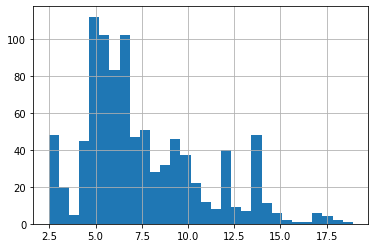

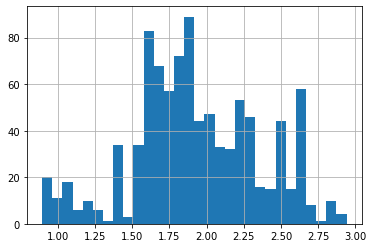

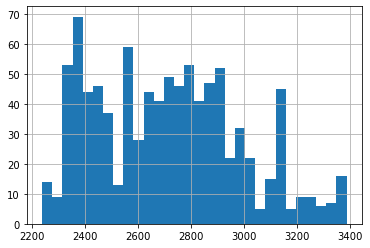

None


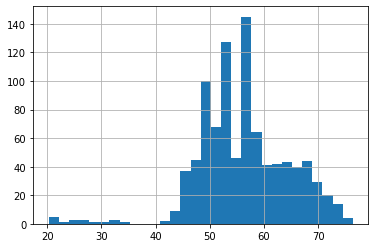

None


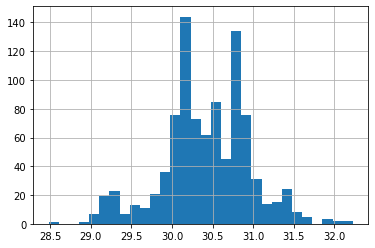

None


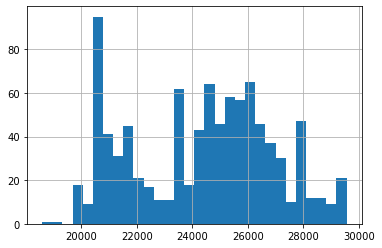

None


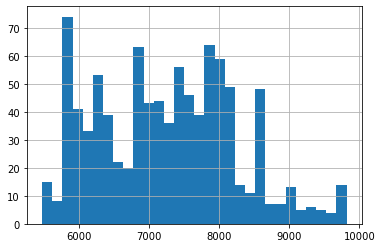

None


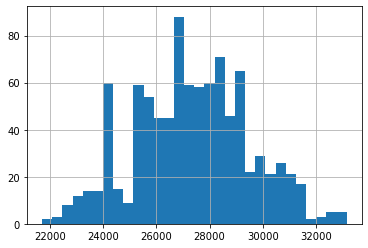

None


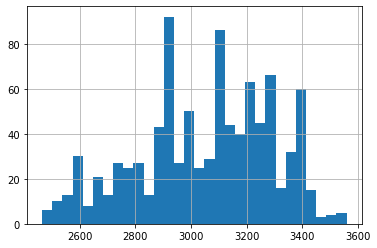

None


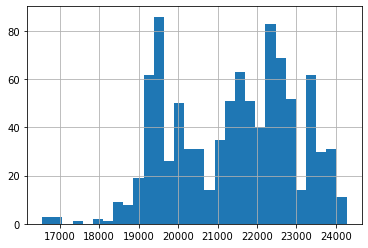

None


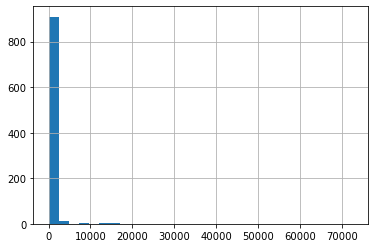

None


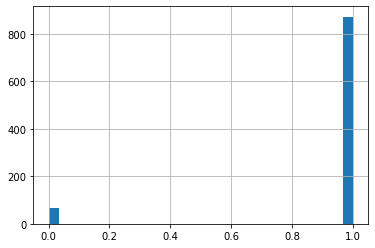

None


In [7]:
y.hist(bins = 30)
plt.show()

y = np.log(y)
y.hist(bins = 30)
plt.show()

for i in X.columns:
    X[i].hist(bins = 30)
    print(plt.show())

In [8]:
X

,S&P 500,原油,美元,道瓊,那斯達克,恒生,上證,日經,每日確診,cov期間
1,2270.75,53.26,32.227,19942.16,5477.00,22134.47,3158.79,19594.16,0.0,1.0
2,2269.00,53.76,32.229,19899.29,5487.94,22456.69,3165.41,19520.69,0.0,1.0
3,2276.98,53.99,31.943,19963.80,5521.06,22503.01,3154.32,19454.33,0.0,1.0
4,2268.90,51.96,32.041,19887.38,5531.82,22558.69,3171.24,19454.33,0.0,1.0
5,2268.90,50.82,32.003,19855.53,5551.82,22744.85,3161.67,19301.44,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
934,2541.47,21.84,30.131,21636.78,7502.38,23484.28,2772.20,19389.43,60350.0,0.0
935,2626.65,20.46,30.167,22327.48,7774.15,23175.11,2747.21,19084.97,57810.0,0.0
936,2584.59,20.24,30.030,21917.16,7700.10,23603.48,2750.30,18917.01,63561.0,0.0
937,2470.50,21.20,30.230,20943.51,7360.58,23085.79,2734.52,18065.41,72599.0,0.0


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# X_train, X_test, y_train, y_test = X[:683], X[683:], y[:683], y[683:]

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler

In [11]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [12]:
# lr = make_pipeline(StandardScaler(), LinearRegression())
# lasso = make_pipeline(StandardScaler(), Lasso())
# ridge = make_pipeline(StandardScaler(), Ridge())
# elnet = make_pipeline(StandardScaler(), ElasticNet())
# svr = make_pipeline(StandardScaler(), LinearSVR())
# sgd = make_pipeline(StandardScaler(), SGDRegressor())

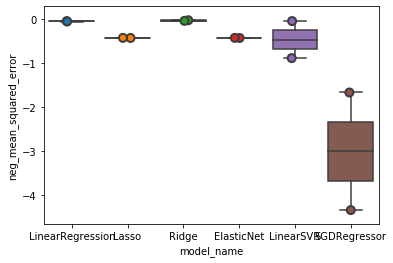

In [13]:


models = [LinearRegression(), Lasso(), Ridge(), ElasticNet(), LinearSVR(), SGDRegressor()]

CV = 2
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  scores = cross_val_score(model, X_std, y, scoring='neg_mean_squared_error', cv=CV)
  for fold_idx, neg_mean_squared_error in enumerate(scores):
    entries.append((model_name, fold_idx, neg_mean_squared_error))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'neg_mean_squared_error'])
import seaborn as sns
sns.boxplot(x='model_name', y='neg_mean_squared_error', data=cv_df)
sns.stripplot(x='model_name', y='neg_mean_squared_error', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [14]:
cv_df.groupby('model_name').mean()

,fold_idx,neg_mean_squared_error
model_name,,
ElasticNet,0.5,-0.420852
Lasso,0.5,-0.420852
LinearRegression,0.5,-0.042961
LinearSVR,0.5,-0.458828
Ridge,0.5,-0.024984
SGDRegressor,0.5,-3.002835


In [15]:
alpha = np.logspace(-3, 3, 7)
fit_intercept = [True, False]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
ridge_param_grid = {'alpha':alpha, 'fit_intercept':fit_intercept,'solver':solver}
ridge_gs = GridSearchCV(Ridge(), param_grid=ridge_param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)

epsilon = np.logspace(-3, 3, 7)
loss = ['epsilon_insensitive', 'squared_epsilon_insensitive']
fit_intercept = [True, False]
C = np.logspace(-3, 3, 7)
svm_param_grid = {'epsilon':epsilon, 'fit_intercept':fit_intercept,'loss':loss, 'C':C}
svm_gs = GridSearchCV(LinearSVR(), param_grid=svm_param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)

param_grid_SGD = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    }
SGD = GridSearchCV(SGDRegressor(), param_grid_SGD, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)

In [16]:
model = ridge_gs
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
    
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.007, test: 0.007
R^2 train: 0.964, test: 0.958


In [17]:
y_test_pred = np.exp(y_test_pred)
y_temp =  y_test[:]
y_temp = np.exp(y_test)
y_temp.index = [i for i in range(len(y_temp))]
y_temp = pd.concat([pd.DataFrame(y_test_pred),y_temp],axis=1)
y_temp.columns = ['pred', 'FB_VIX']
y_temp['error'] = y_temp.pred - y_temp.FB_VIX
y_temp

,pred,FB_VIX,error
0,3.301343,2.87,0.431343
1,6.439696,6.91,-0.470304
2,3.223845,2.88,0.343845
3,9.565053,10.03,-0.464947
4,14.018313,17.30,-3.281687
...,...,...,...
183,5.795938,5.43,0.365938
184,4.841286,5.05,-0.208714
185,13.511536,18.07,-4.558464
186,9.684940,8.85,0.834940


In [18]:
model.fit(X, y)
res = model.predict(valid_X)
res = np.exp(res)
res = pd.DataFrame(res)
valid_y.index = [i for i in range(len(valid_y))]
res = pd.concat([res, valid_y], axis=1)
res.columns = ['FB_VIX_預測', 'FB_VIX_實際']
res['誤差'] = res.FB_VIX_預測 - res.FB_VIX_實際
res.to_csv('res.csv', encoding='utf_8_sig')
res

,FB_VIX_預測,FB_VIX_實際,誤差
0,8.317785,7.69,0.627785
1,7.527465,7.80,-0.272535
2,7.277699,7.83,-0.552301
3,7.218767,7.58,-0.361233
4,7.138854,7.67,-0.531146
5,5.818461,7.01,-1.191539
6,6.402260,6.75,-0.347740
7,6.518600,7.42,-0.901400
8,5.641902,7.05,-1.408098
9,4.299468,7.13,-2.830532
